In [2]:
import requests
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
def json_datafram(response):
    return pd.DataFrame(response.json()[1:], columns= response.json()[0])


In [4]:
url_summary = "https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,SEX_LABEL,SEX,ETH_GROUP_LABEL,ETH_GROUP,RACE_GROUP_LABEL,RACE_GROUP,VET_GROUP_LABEL,VET_GROUP,FIRMPDEMP&for=state:*&NAICS2017=00&key=eaffa087c0e9591a49fb3f2c311b2c496b4e365c"
url_owner = "https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNPDEMP&for=state:*&OWNCHAR=CG&NAICS2017=00&QDESC=O02&key=eaffa087c0e9591a49fb3f2c311b2c496b4e365c"
url_buisness = "https://api.census.gov/data/2018/abscb?get=NAME,GEO_ID,NAICS2017_LABEL,SEX_LABEL,SEX,ETH_GROUP_LABEL,ETH_GROUP,RACE_GROUP_LABEL,RACE_GROUP,VET_GROUP_LABEL,VET_GROUP,FIRMPDEMP,EMP&for=state:*&NAICS2017=00&BUSCHAR=A1&QDESC=B01&key=eaffa087c0e9591a49fb3f2c311b2c496b4e365c"
url_tech = "https://api.census.gov/data/2018/abstcb?get=NAME,GEO_ID,NAICS2017_LABEL,TECHUSE,FIRMPDEMP,EMP&for=state:*&NAICS2017=00&key=eaffa087c0e9591a49fb3f2c311b2c496b4e365c"
response_summary = requests.request("GET", url_summary)
response_owner = requests.request("GET", url_owner)
response_tech = requests.request("GET",url_tech)
response_buisness = requests.request("GET",url_buisness)

In [5]:
df_owner = json_datafram(response_owner)
df_summary = json_datafram(response_summary)
df_tech = json_datafram(response_tech)
df_business = json_datafram(response_buisness)

In [16]:
df_owner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              51 non-null     object
 1   GEO_ID            51 non-null     object
 2   NAICS2017_LABEL   51 non-null     object
 3   OWNER_SEX         51 non-null     object
 4   OWNER_SEX_LABEL   51 non-null     object
 5   OWNER_ETH         51 non-null     object
 6   OWNER_ETH_LABEL   51 non-null     object
 7   OWNER_RACE        51 non-null     object
 8   OWNER_RACE_LABEL  51 non-null     object
 9   OWNER_VET         51 non-null     object
 10  OWNPDEMP          51 non-null     object
 11  OWNCHAR           51 non-null     object
 12  NAICS2017         51 non-null     object
 13  QDESC             51 non-null     object
 14  state             51 non-null     object
dtypes: object(15)
memory usage: 6.1+ KB


In [74]:
df_summary.groupby(["ETH_GROUP_LABEL"])["NAME"].count()

ETH_GROUP_LABEL
Classifiable                       51
Equally Hispanic/non-Hispanic     953
Hispanic                         1585
Non-Hispanic                     2325
Total                            4703
Unclassifiable                     51
Name: NAME, dtype: int64

In [193]:
df_business.head()

,NAME,GEO_ID,NAICS2017_LABEL,SEX_LABEL,SEX,ETH_GROUP_LABEL,ETH_GROUP,RACE_GROUP_LABEL,RACE_GROUP,VET_GROUP_LABEL,VET_GROUP,FIRMPDEMP,EMP,NAICS2017,BUSCHAR,QDESC,state
0,Mississippi,0400000US28,Total for all sectors,Total,001,Total,001,Total,00,Total,001,40856,920447,00,A1,B01,28
1,Missouri,0400000US29,Total for all sectors,Total,001,Total,001,Total,00,Total,001,106753,2464500,00,A1,B01,29
2,Montana,0400000US30,Total for all sectors,Total,001,Total,001,Total,00,Total,001,31661,361600,00,A1,B01,30
3,Nebraska,0400000US31,Total for all sectors,Total,001,Total,001,Total,00,Total,001,43189,855009,00,A1,B01,31
4,Nevada,0400000US32,Total for all sectors,Total,001,Total,001,Total,00,Total,001,51758,1240230,00,A1,B01,32


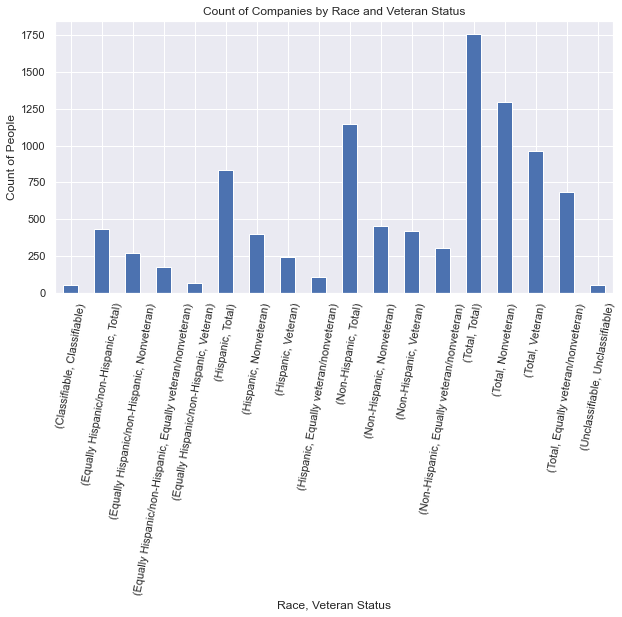

In [121]:
# df_summary.head()
race_veteran_status =df_summary.groupby(["ETH_GROUP_LABEL"])["VET_GROUP_LABEL"].value_counts().copy()
plt.figure(figsize=(10,5))
race_veteran_status.plot.bar()
plt.xlabel("Race, Veteran Status")
plt.ylabel("Count of People")
plt.title("Count of Companies by Race and Veteran Status")
plt.xticks(rotation = 80);

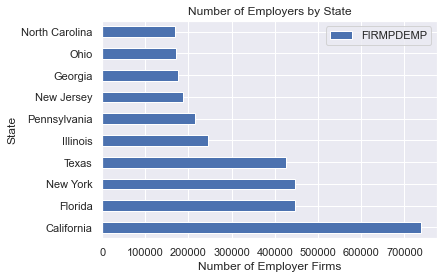

In [167]:
sns.set_theme(style="darkgrid")
df_business["FIRMPDEMP"]= df_business["FIRMPDEMP"].astype(str).astype(int)
df_business_top10 = df_business.sort_values(by=["FIRMPDEMP"], ascending=False)
df_business_top10 = df_business_top10.head(10)
df_business_top10.head(20)
df_business_top10.plot.barh(x="NAME",y="FIRMPDEMP")
plt.ylabel("State")
plt.xlabel("Number of Employer Firms")
plt.title("Number of Employers by State");

In [189]:
df_tech_name_emp_geo = df_tech[["NAME","GEO_ID","EMP"]].copy()
df_tech_name_emp_geo["EMP"] = df_tech_name_emp_geo["EMP"].astype(str).astype(int)
df_tech_name_emp_geo_mean =df_tech_name_emp_geo[["NAME","GEO_ID","EMP"]].groupby(["NAME","GEO_ID"])["EMP"].sum()
df_tech_name_emp_geo_mean.head()




NAME        GEO_ID     
Alabama     0400000US01     16730215
Alaska      0400000US02      2592183
Arizona     0400000US04     21194337
Arkansas    0400000US05      9976759
California  0400000US06    129954710
Name: EMP, dtype: int32

In [137]:
df_summary.head(10)


,NAME,GEO_ID,NAICS2017_LABEL,SEX_LABEL,SEX,ETH_GROUP_LABEL,ETH_GROUP,RACE_GROUP_LABEL,RACE_GROUP,VET_GROUP_LABEL,VET_GROUP,FIRMPDEMP,NAICS2017,state
0,Mississippi,0400000US28,Total for all sectors,Female,002,Non-Hispanic,029,Total,00,Equally veteran/nonveteran,003,0,00,28
1,Mississippi,0400000US28,Total for all sectors,Male,003,Non-Hispanic,029,Total,00,Equally veteran/nonveteran,003,466,00,28
2,Mississippi,0400000US28,Total for all sectors,Equally male/female,004,Non-Hispanic,029,Total,00,Equally veteran/nonveteran,003,572,00,28
3,Mississippi,0400000US28,Total for all sectors,Total,001,Total,001,White,30,Equally veteran/nonveteran,003,926,00,28
4,Mississippi,0400000US28,Total for all sectors,Classifiable,096,Classifiable,096,Classifiable,96,Classifiable,096,37489,00,28
5,Mississippi,0400000US28,Total for all sectors,Female,002,Total,001,Total,00,Total,001,6659,00,28
6,Mississippi,0400000US28,Total for all sectors,Male,003,Total,001,Total,00,Total,001,25943,00,28
7,Mississippi,0400000US28,Total for all sectors,Female,002,Total,001,Black or African American,40,Total,001,0,00,28
8,Mississippi,0400000US28,Total for all sectors,Female,002,Total,001,Equally minority/nonminority,91,Total,001,0,00,28
9,Mississippi,0400000US28,Total for all sectors,Male,003,Total,001,Equally minority/nonminority,91,Total,001,108,00,28


In [196]:
df_business[0:10].sort_values(by="FIRMPDEMP",ascending=False).head()


,NAME,GEO_ID,NAICS2017_LABEL,SEX_LABEL,SEX,ETH_GROUP_LABEL,ETH_GROUP,RACE_GROUP_LABEL,RACE_GROUP,VET_GROUP_LABEL,VET_GROUP,FIRMPDEMP,EMP,NAICS2017,BUSCHAR,QDESC,state
4,Nevada,0400000US32,Total for all sectors,Total,001,Total,001,Total,00,Total,001,51758,1240230,00,A1,B01,32
8,New York,0400000US36,Total for all sectors,Total,001,Total,001,Total,00,Total,001,446155,8073389,00,A1,B01,36
3,Nebraska,0400000US31,Total for all sectors,Total,001,Total,001,Total,00,Total,001,43189,855009,00,A1,B01,31
0,Mississippi,0400000US28,Total for all sectors,Total,001,Total,001,Total,00,Total,001,40856,920447,00,A1,B01,28
7,New Mexico,0400000US35,Total for all sectors,Total,001,Total,001,Total,00,Total,001,32197,584145,00,A1,B01,35


In [132]:
df_owner.head()

,NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNPDEMP,OWNCHAR,NAICS2017,QDESC,state
0,Mississippi,0400000US28,Total for all sectors,001,All owners of respondent firms,001,All owners of respondent firms,00,All owners of respondent firms,001,1158,CG,00,O02,28
1,Missouri,0400000US29,Total for all sectors,001,All owners of respondent firms,001,All owners of respondent firms,00,All owners of respondent firms,001,3564,CG,00,O02,29
2,Montana,0400000US30,Total for all sectors,001,All owners of respondent firms,001,All owners of respondent firms,00,All owners of respondent firms,001,748,CG,00,O02,30
3,Rhode Island,0400000US44,Total for all sectors,001,All owners of respondent firms,001,All owners of respondent firms,00,All owners of respondent firms,001,312,CG,00,O02,44
4,Alabama,0400000US01,Total for all sectors,001,All owners of respondent firms,001,All owners of respondent firms,00,All owners of respondent firms,001,2042,CG,00,O02,01


In [136]:
owner_buisness = df_owner.merge(df_business,how="inner",on="GEO_ID")
owner_buisness.columns

Index(['NAME_x', 'GEO_ID', 'NAICS2017_LABEL_x', 'OWNER_SEX', 'OWNER_SEX_LABEL',
       'OWNER_ETH', 'OWNER_ETH_LABEL', 'OWNER_RACE', 'OWNER_RACE_LABEL',
       'OWNER_VET', 'OWNPDEMP', 'OWNCHAR', 'NAICS2017_x', 'QDESC_x', 'state_x',
       'NAME_y', 'NAICS2017_LABEL_y', 'SEX_LABEL', 'SEX', 'ETH_GROUP_LABEL',
       'ETH_GROUP', 'RACE_GROUP_LABEL', 'RACE_GROUP', 'VET_GROUP_LABEL',
       'VET_GROUP', 'FIRMPDEMP', 'NAICS2017_y', 'BUSCHAR', 'QDESC_y',
       'state_y'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

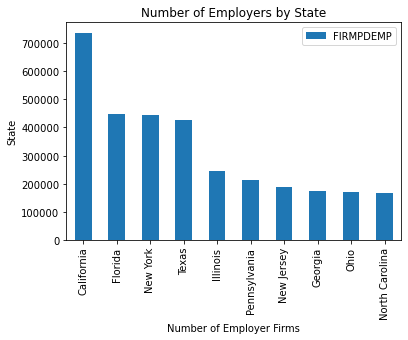

In [6]:
plt.figure(figsize=(20,20))
df_business["FIRMPDEMP"]= df_business["FIRMPDEMP"].astype(str).astype(int)
df_business_top10 = df_business.sort_values(by=["FIRMPDEMP"], ascending=False)
df_business_top10 = df_business_top10.head(10)
df_business_top10.head(20)
df_business_top10.plot.bar(x="NAME",y="FIRMPDEMP")
plt.ylabel("State")
plt.xlabel("Number of Employer Firms")
plt.title("Number of Employers by State");

<Figure size 1440x1440 with 0 Axes>

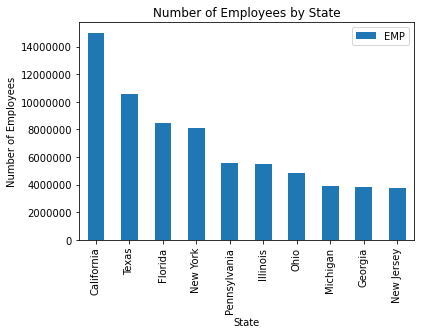

In [30]:
plt.figure(figsize=(20,20))
df_business["EMP"]= df_business["EMP"].astype(str).astype(int)
df_business_top10 = df_business.sort_values(by=["EMP"], ascending=False)
df_business_top10 = df_business_top10.head(10)
df_business_top10.head(20)
df_business_top10.plot.bar(x="NAME",y="EMP")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("State")
plt.ylabel("Number of Employees")
plt.title("Number of Employees by State");

C:\Users\patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


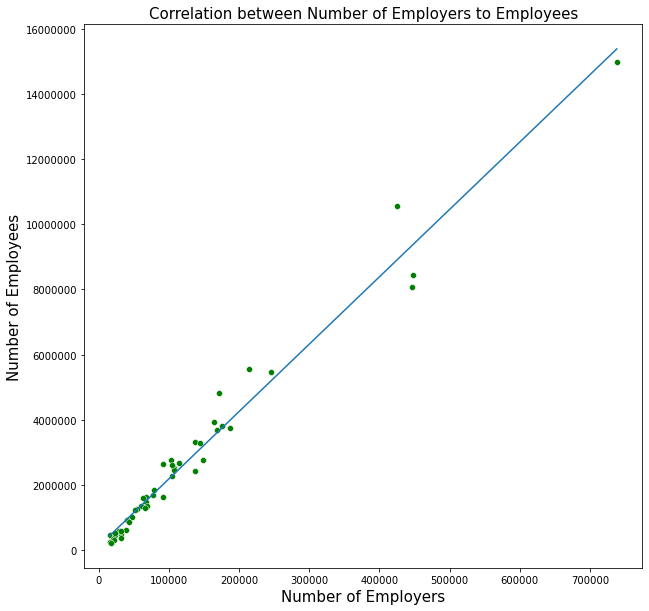

In [36]:
business_employee_employer = df_business[["NAME","EMP","FIRMPDEMP"]].sort_values(by="NAME")
business_employee_employer = business_employee_employer[["EMP","FIRMPDEMP"]]
x_employer = business_employee_employer["FIRMPDEMP"].tolist()
y_employee = business_employee_employer["EMP"].tolist()
x_axis =np.array(x_employer, dtype=np.int64)
y_axis = np.array(y_employee, dtype=np.int64)
employee_employer_model = linear_model.LinearRegression()
employee_employer_model.fit(x_axis.reshape(-1,1),y_axis)
regression_line = employee_employer_model.predict(x_axis.reshape(-1,1))
plt.figure(figsize=(10,10))
ax =sns.scatterplot(x=x_axis, y=y_axis, color ="Green")
ax1 = sns.lineplot(x_axis, y=regression_line)
ax.set_xlabel("Number of Employers",fontsize =15)
ax.set_ylabel("Number of Employees", fontsize = 15)
ax.set_title("Correlation between Number of Employers to Employees", fontsize = 15)
plt.ticklabel_format(style='plain', axis='y');
